In [4]:
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from matplotlib import animation

In [6]:
def get_data(filename):

    all_coords = []

    with open(filename, 'r') as f:
        data = f.read().split('\n\n')[:-1] # split data into blocks, ignore blank line at end

        for i, block in enumerate(data):
            coordinates = np.array([list(map(float, line.split())) for line in block.split('\n')])
            all_coords.append(coordinates)
            
    return all_coords

In [7]:
n = 100

coordinates_serial = get_data('worldlines_serial.txt')
coordinates_parallel = get_data('worldlines_parallel.txt')
n = len(coordinates_serial)


<IPython.core.display.Javascript object>


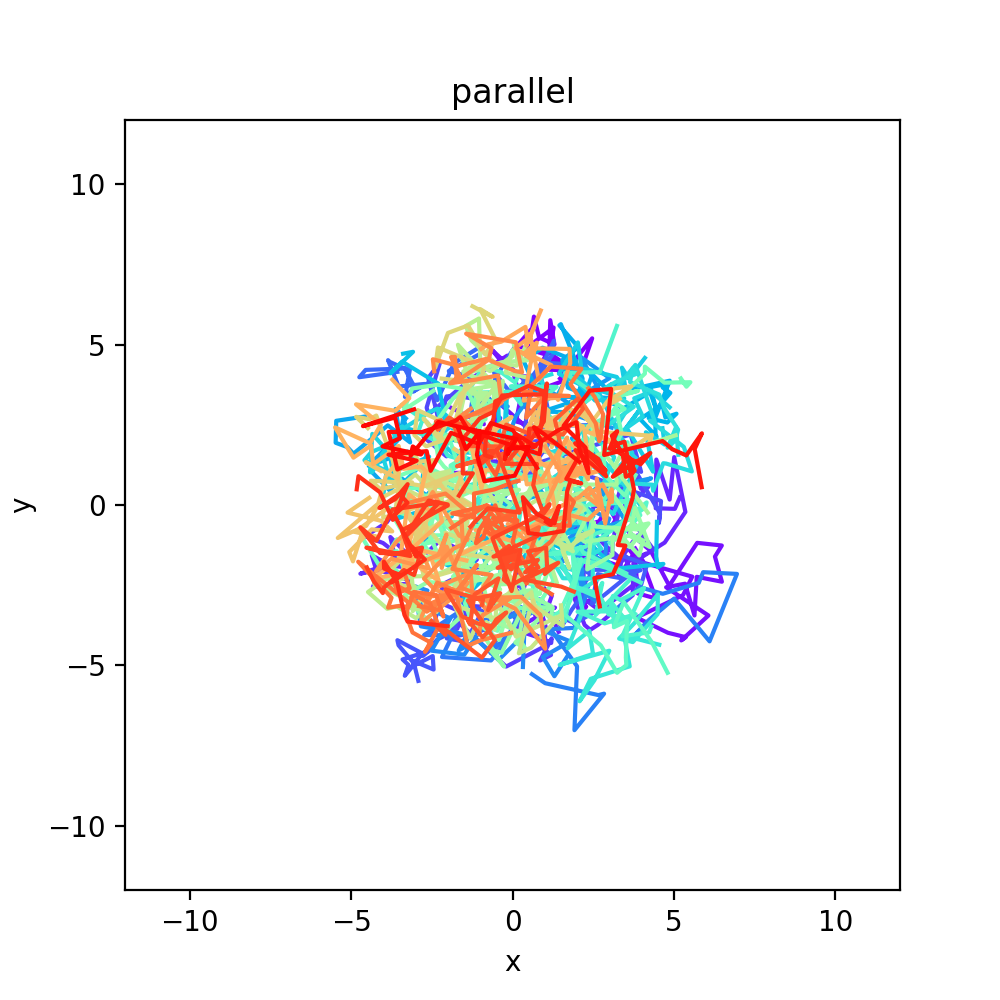

1.00301


In [10]:



fig = plt.figure(figsize = (5, 5))


plt.xlabel("x")
plt.ylabel("y")
plt.ylim(-12,12)
plt.xlim(-12,12)



# https://stackoverflow.com/questions/21937976/defining-multiple-plots-to-be-animated-with-a-for-loop-in-matplotlib
lines = [plt.plot([], [], color=plt.cm.rainbow(j/n))[0] for j in range(n)] #lines to animate

def init():
    #init lines
    for line in lines:
        line.set_data([], [])
    return lines, #return everything that must be updated

"""
def animate(i):
    #animate lines
    for j,line in enumerate(lines):
        line.set_data(coordinates_serial[j][:i,0], coordinates_serial[j][:i,1])
    return lines,
plt.title("serial")
"""
def animate(i):
    #animate lines
    for j,line in enumerate(lines):
        line.set_data(coordinates_parallel[j][:i,0], coordinates_parallel[j][:i,1])
    return lines,
plt.title("parallel")


print(coordinates_serial[3][4,0])

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=40)

plt.show()

